Nabila Fortune Muslimah

# **K-Means Clustering**

**Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
mcs = pd.read_csv('Mall_Customers.csv')
mcs

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
mcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
mcs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


**Handling Missing Value**

In [ ]:
print(mcs.shape)
mcs.isnull().sum()

(200, 5)


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Cek Duplikasi Data**

In [ ]:
print('Data Duplikasi: ',mcs.duplicated().sum())
mcs[mcs.duplicated()]

Data Duplikasi:  0


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


**Feature Encoding**

In [ ]:
mcs_encode = mcs.copy()

**Encoding Data Nominal**

('Genre')

Pada One Hot Encoding, setiap kategori pada suatu feature akan diurutkan secara alfabet dan direpresentasikan sebagai sekumpulan bits.

In [ ]:
# Colomn Genre dimana sekumpulan nilainya akan dikonversikan ke dalam sebuah array
# Nilai array akan ditampung ke dalam variable x
# Kenapa menggunakan Reshape(-1,1), karena sekumpulan nilai ini 
# diperlakukan seperti nilai features
# Dimana nilai features dalam sklearn diharapkan ditampung dalam array 2d

x = mcs['Genre'].values.reshape(-1,1)
x 

array([['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Femal

In [ ]:
# Menerapkan One Hot Encoding
# Import modul terlebih dahulu
# Bentuk object dari class one hot encoder yang akan 
# ditampung ke dalam onehot_encoder

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
x = onehot_encoder.fit_transform(x).toarray()
x

In [ ]:
onehot_encoder.categories_

[array(['Female', 'Male'], dtype=object)]

In [ ]:

mcs_onehot = pd.DataFrame(x, columns=[str(i) for i in range(x.shape[1])])
mcs_onehot

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
195,1.0,0.0
196,1.0,0.0
197,0.0,1.0
198,0.0,1.0


In [ ]:
#
mcs = pd.concat([mcs_onehot, mcs], axis=1)
mcs

,0,1,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,1.0,1,Male,19,15,39
1,0.0,1.0,2,Male,21,15,81
2,1.0,0.0,3,Female,20,16,6
3,1.0,0.0,4,Female,23,16,77
4,1.0,0.0,5,Female,31,17,40
...,...,...,...,...,...,...,...
195,1.0,0.0,196,Female,35,120,79
196,1.0,0.0,197,Female,45,126,28
197,0.0,1.0,198,Male,32,126,74
198,0.0,1.0,199,Male,32,137,18


In [ ]:
# mcs = mcs.drop(['Genre'], axis=1)
encode = mcs.drop(['Genre','1','CustomerID'], axis=1)
encode

,0,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,19,15,39
1,0.0,21,15,81
2,1.0,20,16,6
3,1.0,23,16,77
4,1.0,31,17,40
...,...,...,...,...
195,1.0,35,120,79
196,1.0,45,126,28
197,0.0,32,126,74
198,0.0,32,137,18


**Handling Outliers**

In [ ]:
encode = mcs_encode.copy()

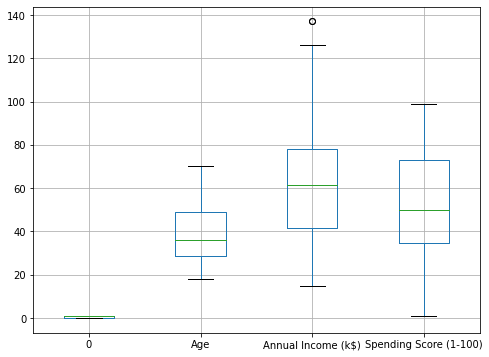

In [ ]:
plt.figure(figsize=(8,6))
encode.boxplot()
plt.show()

In [ ]:
# Quartile
Q1 = encode['Annual Income (k$)'].quantile(0.25)
Q3 = encode['Annual Income (k$)'].quantile(0.75)

Q1,Q3

(41.5, 78.0)

In [ ]:
IQR = Q3-Q1
IQR

36.5

In [ ]:
lowwer_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lowwer_limit,upper_limit

(-13.25, 132.75)

In [ ]:
encode[(encode['Annual Income (k$)'] > lowwer_limit) | (encode['Annual Income (k$)'] < upper_limit)]

,0,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,19,15,39
1,0.0,21,15,81
2,1.0,20,16,6
3,1.0,23,16,77
4,1.0,31,17,40
...,...,...,...,...
195,1.0,35,120,79
196,1.0,45,126,28
197,0.0,32,126,74
198,0.0,32,137,18


In [ ]:
mcs_clean = encode[(mcs_copy['Annual Income (k$)'] > lowwer_limit) & (encode['Annual Income (k$)'] < upper_limit)]
mcs_clean

,0,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,19,15,39
1,0.0,21,15,81
2,1.0,20,16,6
3,1.0,23,16,77
4,1.0,31,17,40
...,...,...,...,...
193,1.0,38,113,91
194,1.0,47,120,16
195,1.0,35,120,79
196,1.0,45,126,28


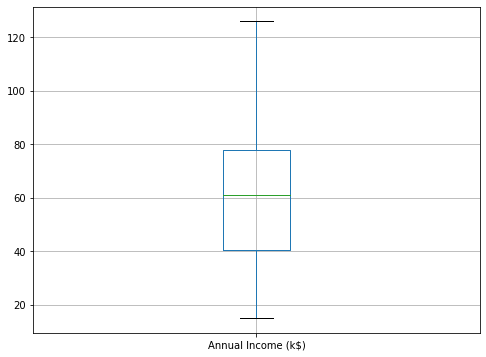

In [ ]:
plt.figure(figsize=(8,6))
mcs_clean.boxplot(column='Annual Income (k$)')
plt.show()

**Visualisasi Heatmap**

In [ ]:
df = mcs_clean.rename(columns={'0':'Genre'})
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,19,15,39
1,0.0,21,15,81
2,1.0,20,16,6
3,1.0,23,16,77
4,1.0,31,17,40
...,...,...,...,...
193,1.0,38,113,91
194,1.0,47,120,16
195,1.0,35,120,79
196,1.0,45,126,28


In [ ]:
cor = df.corr()
cor

,Genre,Age,Annual Income (k$),Spending Score (1-100)
Genre,1.000000,-0.067835,-0.024384,0.059092
Age,-0.067835,1.000000,0.004406,-0.329421
Annual Income (k$),-0.024384,0.004406,1.000000,0.010080
Spending Score (1-100),0.059092,-0.329421,0.010080,1.000000


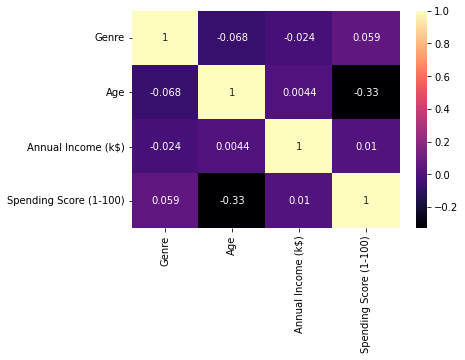

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), cmap='magma',annot=True)
plt.show()


**Normalisasi**

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# array = df.values

# # Membagi array --> input output komponen
# X = array[:,0:10]

# scaler = MinMaxScaler()
# normalize = scaler.fit_transform(X)
# normalize

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df = df.copy()
col = df.columns
df[col] = MinMaxScaler().fit_transform(df[col])
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.009009,0.051020
3,1.0,0.096154,0.009009,0.775510
4,1.0,0.250000,0.018018,0.397959


**Standardisasi**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
col = X_scaled[:,0]
np.var(col)

1.0000000000000018

**Scatter plot Sebelum Clustering**

In [ ]:
def before(at1,at2):
  plt.scatter(df[at1],df[at2])
  plt.xlabel(at1)
  plt.ylabel(at2)

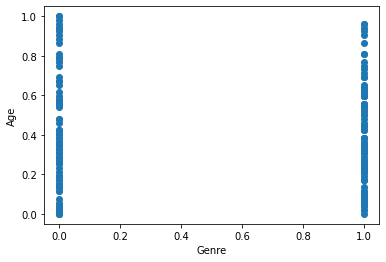

In [ ]:
before('Genre','Age')

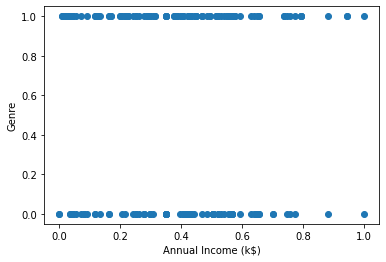

In [ ]:
before('Annual Income (k$)','Genre')

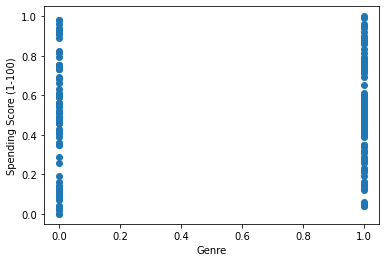

In [ ]:
before('Genre','Spending Score (1-100)')

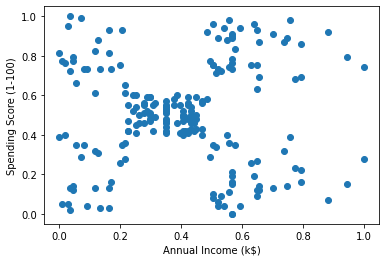

In [ ]:
before('Annual Income (k$)','Spending Score (1-100)')

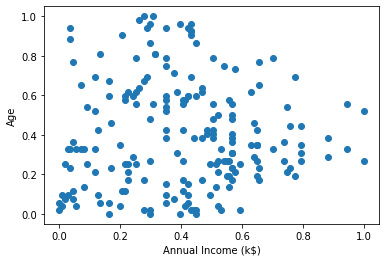

In [ ]:
before('Annual Income (k$)','Age')

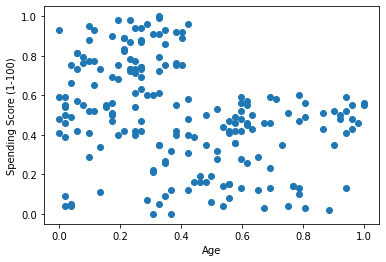

In [ ]:
before('Age','Spending Score (1-100)')

**Modelling**

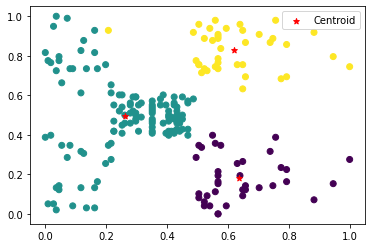

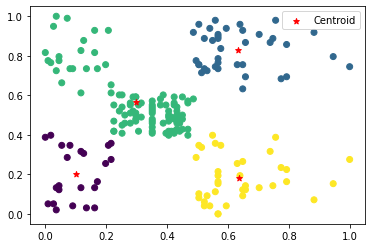

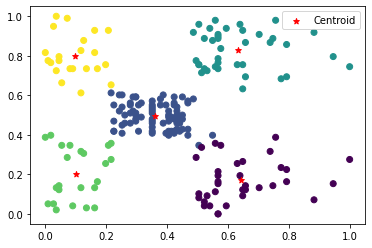

In [ ]:
from sklearn.cluster import KMeans
%matplotlib inline

columns = df[['Annual Income (k$)','Spending Score (1-100)']]

for K in [3,4,5]:
  km = KMeans(n_clusters=K)
  predict = km.fit_predict(columns)
  plt.scatter(columns['Annual Income (k$)'],columns['Spending Score (1-100)'],c=predict)
  plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*",color='red',label='Centroid')
  plt.legend()
  plt.show()